In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6


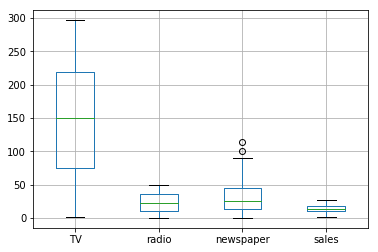

In [3]:
df.boxplot()

Text(0,0.5,'Sales')

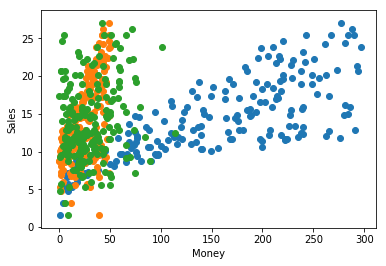

In [14]:
plt.scatter(df['TV'], df['sales'], label='TV')
plt.scatter(df['radio'], df['sales'], label='Radio')
plt.scatter(df['newspaper'], df['sales'], label='Newspaper')

plt.xlabel('Money')
plt.ylabel('Sales')

In [15]:
from pandas.tools.plotting import scatter_matrix

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012AA2811860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000012AA2A94F98>]], dtype=object)

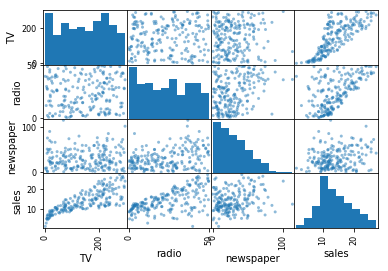

In [17]:
scatter_matrix(df)

In [ ]:
# Probelm 2, Part 2: Predict sales using sklearn

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [48]:
#a) Set y to be the sales in df
y = df['sales']

In [49]:
# b) Set X to be just the features described above in df
X = df[['TV', 'radio', 'newspaper']]

In [50]:
# c) Split the data into training/testing sets
size = len(X)
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

In [51]:
# d) Train model on training data, and make predictions on testing data
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
# e) Evalute the R^2 on testing data. Is this good? Bad? Why?
R2 = regr.score(X_test, y_test)
print (R2)

0.895478287922


In [53]:
# Here, we see that R^2 is close to 0.9 (1 means perfectly matched), which is a good indicator that the regression model is good.

Text(0,0.5,'Predicted Data')

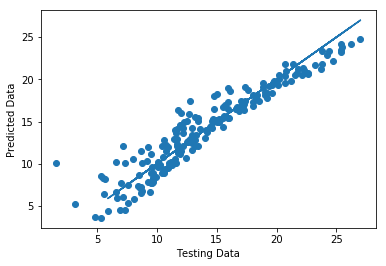

In [55]:
# f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?
plt.scatter(y,regr.predict(X))
plt.plot(y_test,y_test)
plt.xlabel('Testing Data')
plt.ylabel('Predicted Data')

In [ ]:
# Based on this plot, the model matches the data very well.

In [60]:
# g) Can you measure the importance of features in this model? What is something you should check before making conclusions? Try looking at LinearRegression().coef_
print("TV coefficient: ", regr.coef_[0])
print("Radio coefficient: ", regr.coef_[1])
print("Newspaper coefficient: ", regr.coef_[2])


TV coefficient:  0.0472520953737
Radio coefficient:  0.179922000177
Newspaper coefficient:  -0.000944077396472


In [95]:
# Results doesn't match after what is expected. We should normalize the data to make further conclusion.

Coefficients:  [ 4.03622799  2.63419794 -0.0207577 ]


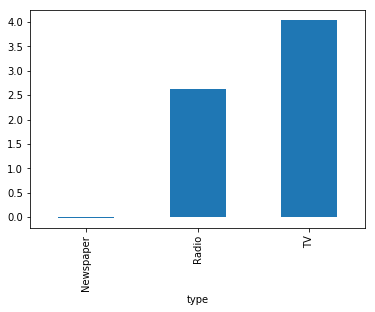

In [111]:
from sklearn import preprocessing
import numpy as np

scaler=preprocessing.StandardScaler()
X1=X_train.as_matrix().astype(np.float)
X1=scaler.fit_transform(X_train)
X2=X_test.as_matrix().astype(np.float)
X2=scaler.fit_transform(X_test)

regr=LinearRegression()
regr.fit(X1,y_train)
print('Coefficients: ',regr.coef_)

scaled_regr.coef_
df=pd.DataFrame({'type':['TV','Radio','Newspaper'],'coef':scaled_regr.coef_})

df.groupby('type')['coef'].mean().plot(kind='bar')

In [ ]:
# h) What can you conclude from g) - can you think of a way to interpret the result? 
#What should we have done to measure the importance of the features involved?
# After we scale the data, results matches what we expect. TV has the most significant impact on sales.

In [ ]:
# How could you have improved performance?
# Plot 3d results using fitted model

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


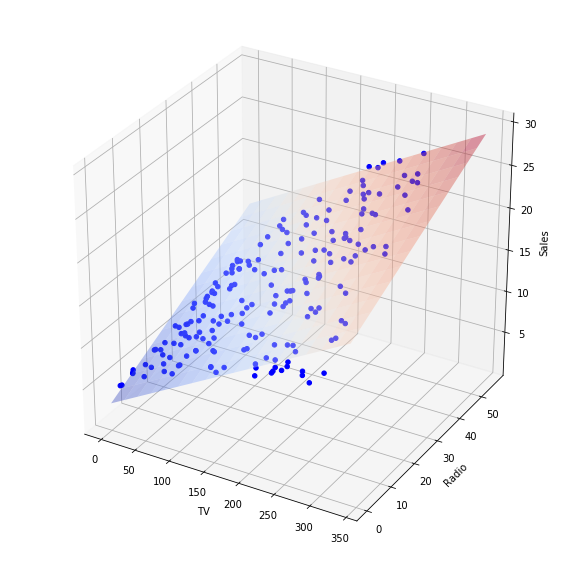

In [125]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='sales~TV + radio', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                # generate a mesh
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                alpha = 0.4,cmap=cm.coolwarm)

ax.scatter(csv['TV'], csv['radio'], csv['sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

In [126]:
#Introduction mixture terms
X['TV*Radio']=X['TV']*X['radio']
X = X.drop(['newspaper'],1)

ValueError: labels ['newspaper'] not contained in axis

In [127]:
size = float(len(X))

X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Coefficients: 
 [ 0.01918396  0.02648516  0.00109794]
Residual sum of squares: 0.39
Variance score: 0.99


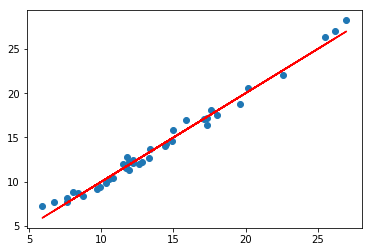

In [128]:
plt.scatter(y_test,regr.predict(X_test))
plt.plot(y_test,y_test,color='r')

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


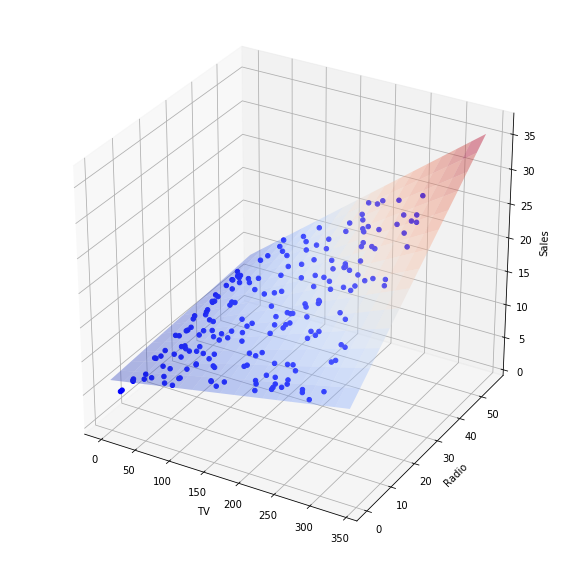

In [130]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# Create a linear OLS model with TV:Radio interaction term 
# such that Sales = beta_0 + beta_1 * TV + beta_2 * Radio + beta_3 * Radio * TV
model = sm.ols(formula='sales ~ TV * radio', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20) 
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)

# Create surface plot
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                alpha = 0.4,cmap=cm.coolwarm)

# Create scatter plot
ax.scatter(csv['TV'], csv['radio'], csv['sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

In [ ]:
# Problem 3: Gradient Descent and the learning rate

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


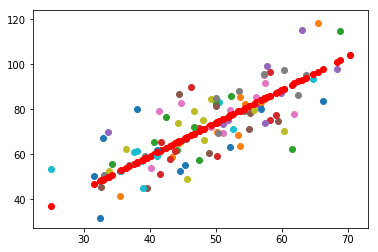

In [36]:
from numpy import *
import matplotlib.pyplot as plt

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("D:\APMAE4990--master\APMAE4990--master\data\data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ('Running...')
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')
    plt.show()

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


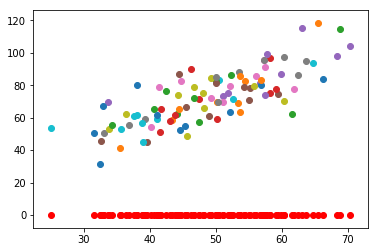

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


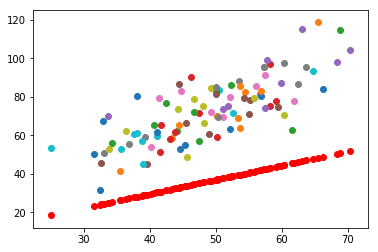

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


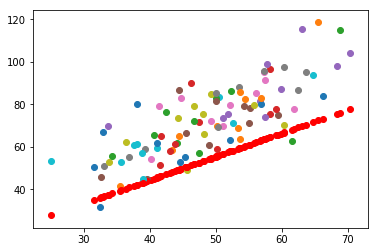

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


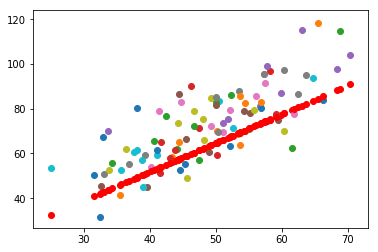

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


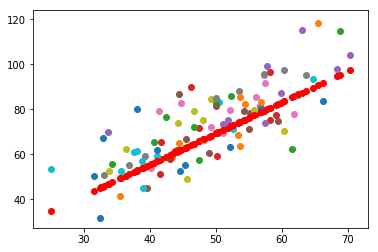

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


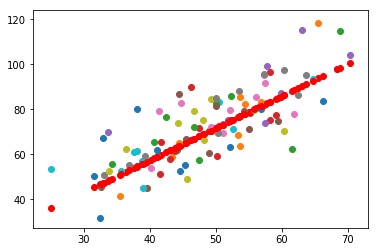

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


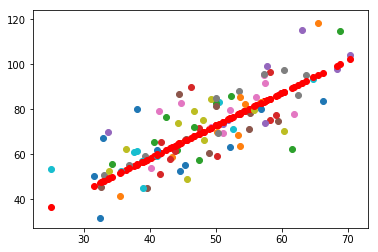

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


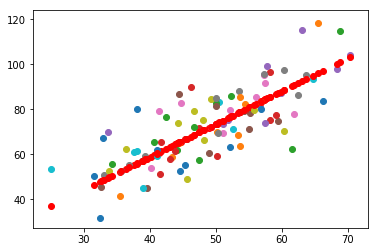

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


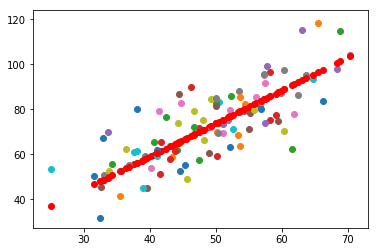

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


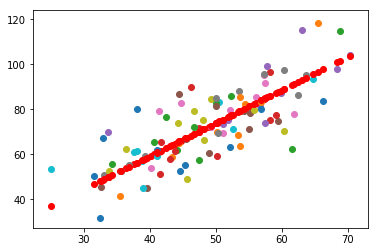

In [37]:
for num in range(0,10):
    run(num)
    plt.show()

In [ ]:
# 
The size of the step in each iteration is controlled by the learning rate. Too big learning rate can quickly reach the minimum, but it is not precise. 

Too small learning rate can reach the minimum very precisely, but it need a lot of step. It is of low efficiency.


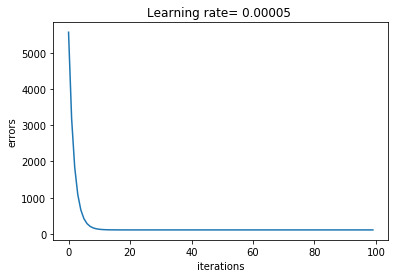

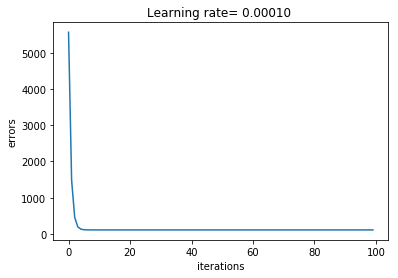

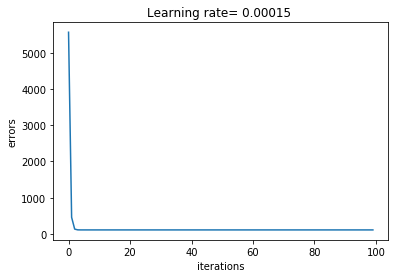

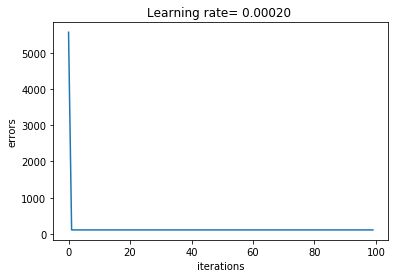

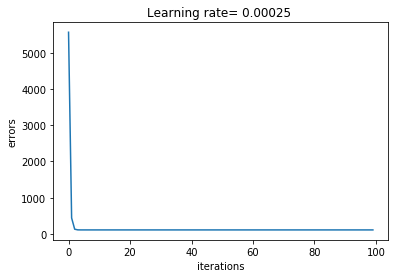

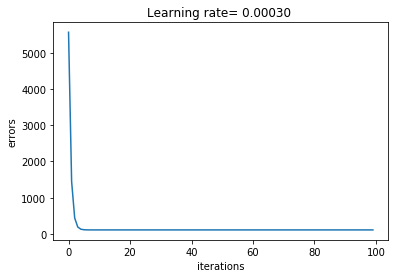

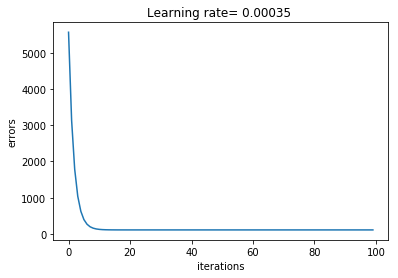

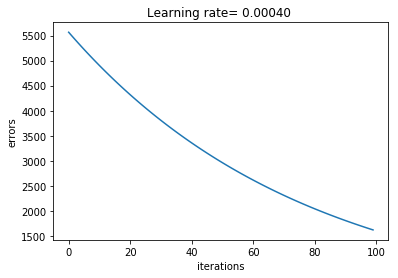

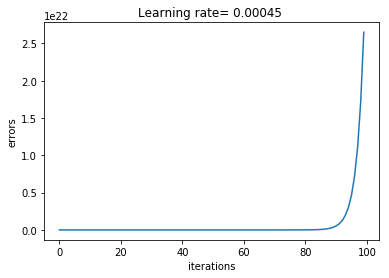

In [76]:
import numpy as np

def plot(learning_rate):
    points = genfromtxt("D:\APMAE4990--master\APMAE4990--master\data\data.csv", delimiter=",")
    iteration = np.arange(100)
    initial_b = 0
    initial_m = 0
    errors = []

    for i in range(0,100):
        [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, i)
        errors.append(compute_error_for_line_given_points(b, m, points))  # get errors
    
    plt.plot(iteration, errors)
    plt.xlabel('iterations')
    plt.ylabel('errors')
    plt.title('Learning rate= %.5f ' % learning_rate)
    plt.show()

for j in range (1,10):
    plot(0.00005*j)

In [ ]:
# As learning rate increase, the convergence becomes fastsr. But when learning rate is larger than 0.00035, the errors get very big.
# It means that small learning rate can reach minimal error but at the price of speed.